In [117]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [118]:
df = pd.read_csv('card_data.csv.xls')


In [119]:
# Print the first 5 rows of the data
df.head()


,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0


In [120]:
# Get the shape of the data
df.shape


(6534, 7)

In [121]:
# Check the data types of the variables
df.dtypes


Name          object
Type          object
Level        float64
Race          object
Attribute     object
ATK          float64
DEF          float64
dtype: object

In [122]:
df.describe()

,Level,ATK,DEF
count,4275.000000,4275.000000,4275.000000
mean,4.449591,1455.553216,1212.318129
std,2.185045,899.165365,802.966529
min,1.000000,0.000000,0.000000
25%,3.000000,800.000000,600.000000
50%,4.000000,1500.000000,1200.000000
75%,6.000000,2100.000000,1800.000000
max,12.000000,5000.000000,5000.000000


In [123]:
# Check missing values
# df.isnull().sum()
df.isnull().sum().sort_values(ascending=False).head()


Level        2259
Attribute    2259
ATK          2259
DEF          2259
Name            0
dtype: int64

In [124]:
df.drop(['Name','Type','Race','Attribute'], axis=1, inplace=True)

In [125]:
# Mengisi nilai null pada dataset dengan nilai mean kolom tersebut
df.loc[(df['Level'].isnull()==True), 'Level']=df['Level'].mean()
df.loc[(df['ATK'].isnull()==True), 'ATK']=df['ATK'].mean()
df.loc[(df['DEF'].isnull()==True), 'DEF']=df['DEF'].mean()
df.isnull().sum().sort_values(ascending=False).head()


Level    0
ATK      0
DEF      0
dtype: int64

In [126]:
df

,Level,ATK,DEF
0,4.449591,1455.553216,1212.318129
1,3.000000,1200.000000,900.000000
2,4.449591,1455.553216,1212.318129
3,4.449591,1455.553216,1212.318129
4,4.000000,920.000000,1930.000000
...,...,...,...
6529,4.449591,1455.553216,1212.318129
6530,2.000000,2400.000000,0.000000
6531,7.000000,2500.000000,2100.000000
6532,7.000000,2500.000000,2000.000000


In [127]:
df.columns= df.columns.str.lower()
df

,level,atk,def
0,4.449591,1455.553216,1212.318129
1,3.000000,1200.000000,900.000000
2,4.449591,1455.553216,1212.318129
3,4.449591,1455.553216,1212.318129
4,4.000000,920.000000,1930.000000
...,...,...,...
6529,4.449591,1455.553216,1212.318129
6530,2.000000,2400.000000,0.000000
6531,7.000000,2500.000000,2100.000000
6532,7.000000,2500.000000,2000.000000


In [128]:
from sklearn.preprocessing import StandardScaler
#Normalisasi Data
X = df.iloc[:,0:3]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[ 0.        ,  0.        ,  0.        ],
       [-0.82027071, -0.35140998, -0.48091913],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 1.44318405,  1.43621366,  1.36688574],
       [ 1.44318405,  1.43621366,  1.212902  ],
       [ 2.00904775,  1.43621366,  1.212902  ]])

In [129]:
from sklearn.decomposition import PCA
pca = PCA()
x_reduced = pca.fit_transform(X)


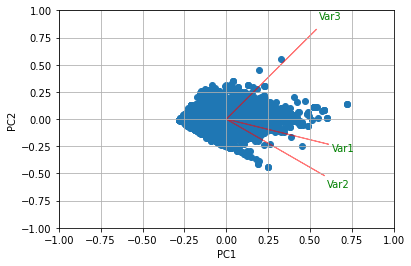

In [130]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()-xs.min())
    scaley = 1.0/(ys.max()-ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)        
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_reduced[:,0:6],np.transpose(pca.components_[0:2, :]))
plt.show()

Berdasarkan hasil plottingan diatas, kepentingna untuk setiap fitur dicerminkan oleh besarnya nilai yang berkorespondensi pada eigenvector (higher magnitude - higher importance)

In [131]:
pca.explained_variance_ratio_

array([0.74057281, 0.17152861, 0.08789858])

PC1 berisi 74% dan PC2 17%. Bersama-sama komponen PC1 dan PC2 saja, maka terdapat total 91% informasi.

In [132]:
print(abs(pca.components_))
print((abs(pca.components_).shape))

[[0.6076657  0.58447367 0.53771081]
 [0.23015071 0.51840505 0.82358172]
 [0.76011383 0.6242169  0.18049993]]
(3, 3)


Disini, pca.components_ mempunyai shape yaitu [n_components, n_features]. Namun, jika kita melihat pada PC1 (First Principal Component) dimana first rownya adalah: [[0.6076657  0.58447367 0.53771081] Maka didapatkan Fitur 1 2 dan 3 adalah fitur yang penting

In [133]:
df

,level,atk,def
0,4.449591,1455.553216,1212.318129
1,3.000000,1200.000000,900.000000
2,4.449591,1455.553216,1212.318129
3,4.449591,1455.553216,1212.318129
4,4.000000,920.000000,1930.000000
...,...,...,...
6529,4.449591,1455.553216,1212.318129
6530,2.000000,2400.000000,0.000000
6531,7.000000,2500.000000,2100.000000
6532,7.000000,2500.000000,2000.000000


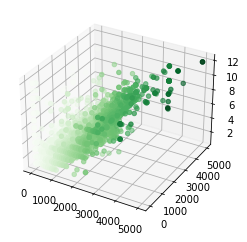

In [134]:
ax = plt.axes(projection='3d')

xdata = df['atk']
ydata = df['def']
zdata = df['level']

ax.scatter3D(xdata, ydata, zdata, c=xdata, cmap='Greens')


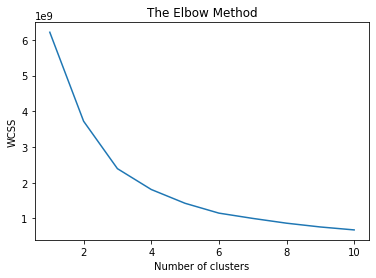

In [135]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [136]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)


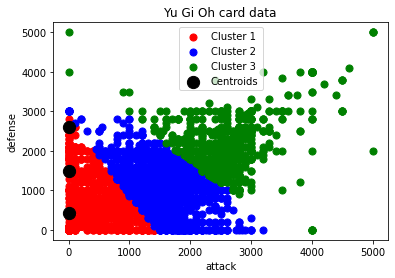

In [137]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0]['atk'], df[y_kmeans == 0]['def'], s=50, c='red', label='Cluster 1')
plt.scatter(df[y_kmeans == 1]['atk'], df[y_kmeans == 1]['def'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[y_kmeans == 2]['atk'], df[y_kmeans == 2]['def'], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label='Centroids')
plt.title('Yu Gi Oh card data')
plt.xlabel('attack')
plt.ylabel('defense')
plt.legend()
plt.show()


In [138]:
# Add new column to the data
df['Cluster'] = y_kmeans


In [139]:
# Show the first 10 rows of the data
df.head(20)


,level,atk,def,Cluster
0,4.449591,1455.553216,1212.318129,1
1,3.000000,1200.000000,900.000000,1
2,4.449591,1455.553216,1212.318129,1
3,4.449591,1455.553216,1212.318129,1
4,4.000000,920.000000,1930.000000,1
5,4.449591,1455.553216,1212.318129,1
6,8.000000,3000.000000,2500.000000,2
7,4.449591,1455.553216,1212.318129,1
8,3.000000,1400.000000,300.000000,1
9,6.000000,2100.000000,200.000000,1


In [140]:
# Show the last 10 rows of the data
df.tail(20)

,level,atk,def,Cluster
6514,4.449591,1455.553216,1212.318129,1
6515,4.449591,1455.553216,1212.318129,1
6516,4.449591,1455.553216,1212.318129,1
6517,4.000000,2500.000000,2000.000000,2
6518,3.000000,1600.000000,800.000000,1
6519,4.449591,1455.553216,1212.318129,1
6520,4.449591,1455.553216,1212.318129,1
6521,4.000000,1200.000000,1600.000000,1
6522,4.000000,1000.000000,2000.000000,1
6523,7.000000,2500.000000,2100.000000,2


In [141]:
# Data type of the Cluster column
df['Cluster'].dtype


dtype('int32')

In [142]:
df['Cluster'].unique()

array([1, 2, 0])

In [143]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('yugiohcard.pkl', 'wb'))